# Case Study: Amazon Customer Data with DBSCAN

In today's lecture, we'll try to segment customers based on 'Amazon Customers Data' which we have already seen in the previous few lectures


In [ ]:
 !wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2025-09-01 13:22:09--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 74.125.23.102, 74.125.23.101, 74.125.23.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2025-09-01 13:22:09--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s   

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.drop('ID',axis=1,inplace=True)

Standardizing only the numerical features

In [ ]:
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
std_df = pd.DataFrame(std_df,columns=df.columns)

std_df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,0.339192
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,-0.310034
2,0.597285,0.193635,-0.246428,0.935872,0.464365,2.077120
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,-0.010392
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,0.578906


In [ ]:
std_df.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03
mean,-3.979039e-17,5.684342e-18,1.421085e-17,7.958079e-17,-5.648815e-17,-4.476419e-17
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00
min,-1.924488e+00,-2.173924e+00,-1.237839e+00,-7.976828e-01,-2.027644e+00,-2.008011e+00
25%,-7.185980e-01,-7.070665e-01,-7.156508e-01,-6.820909e-01,-7.160603e-01,-6.895821e-01
50%,-1.646128e-01,-6.370793e-02,-3.502580e-01,-5.154621e-01,-9.822756e-03,-4.035191e-04
75%,6.080156e-01,6.311193e-01,4.318719e-01,5.975443e-01,6.762366e-01,6.887751e-01
max,4.492619e+00,4.233927e+00,4.387682e+00,4.188302e+00,3.158157e+00,3.835025e+00


### PCA-Visualizing the data in 2D

Converting our data using PCA for visualizing in 2D
#### Let's plot two features data now:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components = pca.fit_transform(std_df)

x = components[:,0]
y = components[:,1]

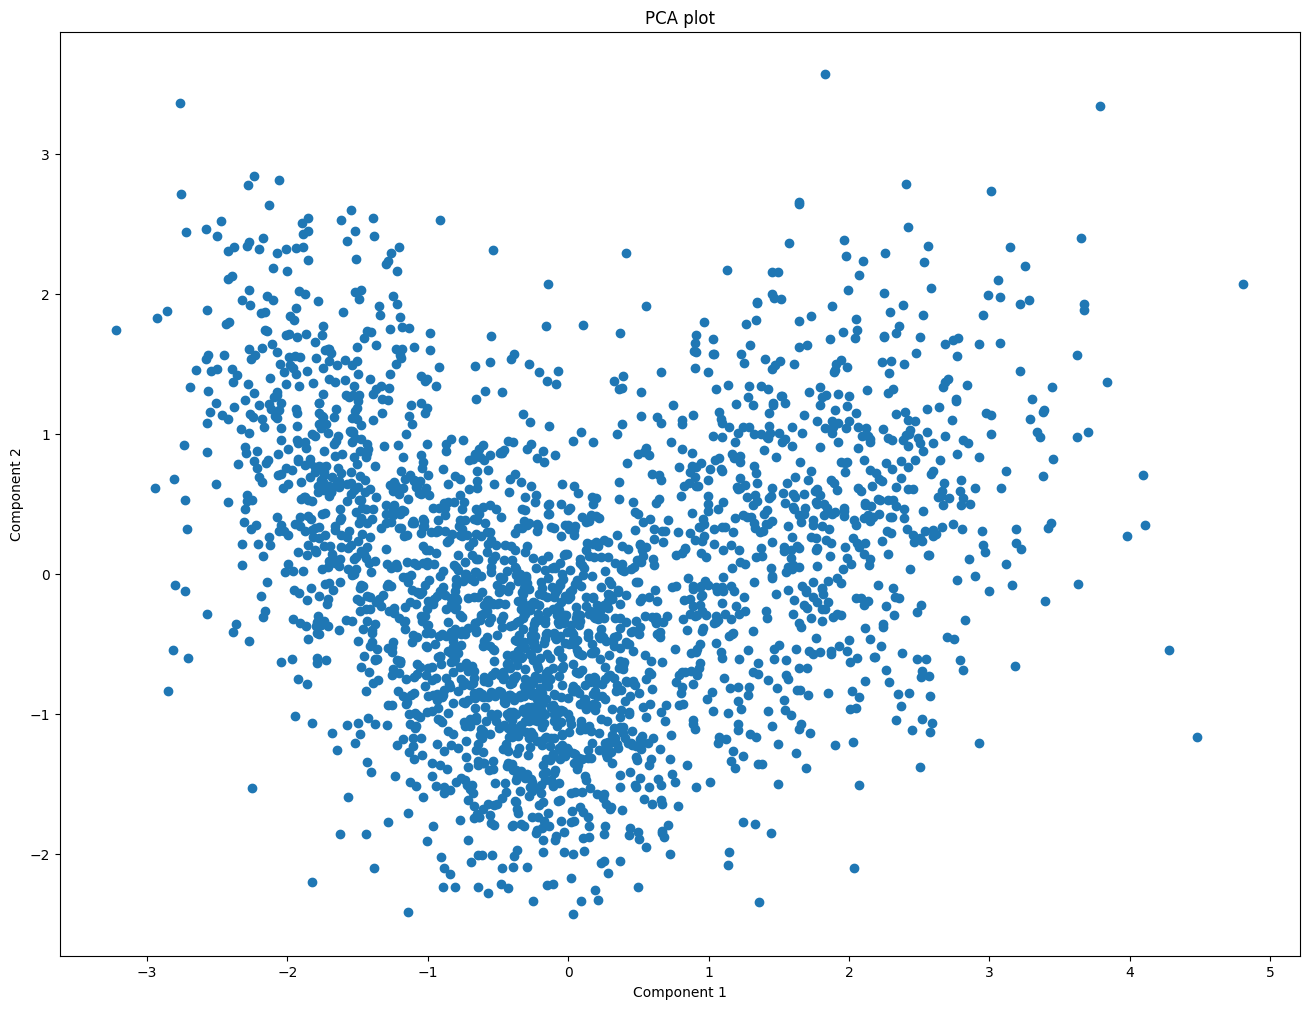

In [ ]:
plt.scatter(x,y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA plot")
plt.show()

**Q. Can you point out some problems that the clustering algorithms that we've learned till now might face?**

- We can easily see the data points that are far away from rest of the data points.

- Well, those are our **outlier** data points.


#### **Fit and Transform using DBSCAN**

In [ ]:
import time
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
start = time.time()
dbsc = DBSCAN(eps = 1.0, min_samples = 12).fit(std_df)
end = time.time()

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0, -1, ...,  0,  0,  0])

In [ ]:
out_df = std_df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

,count
label,
0,1981
-1,514
1,5


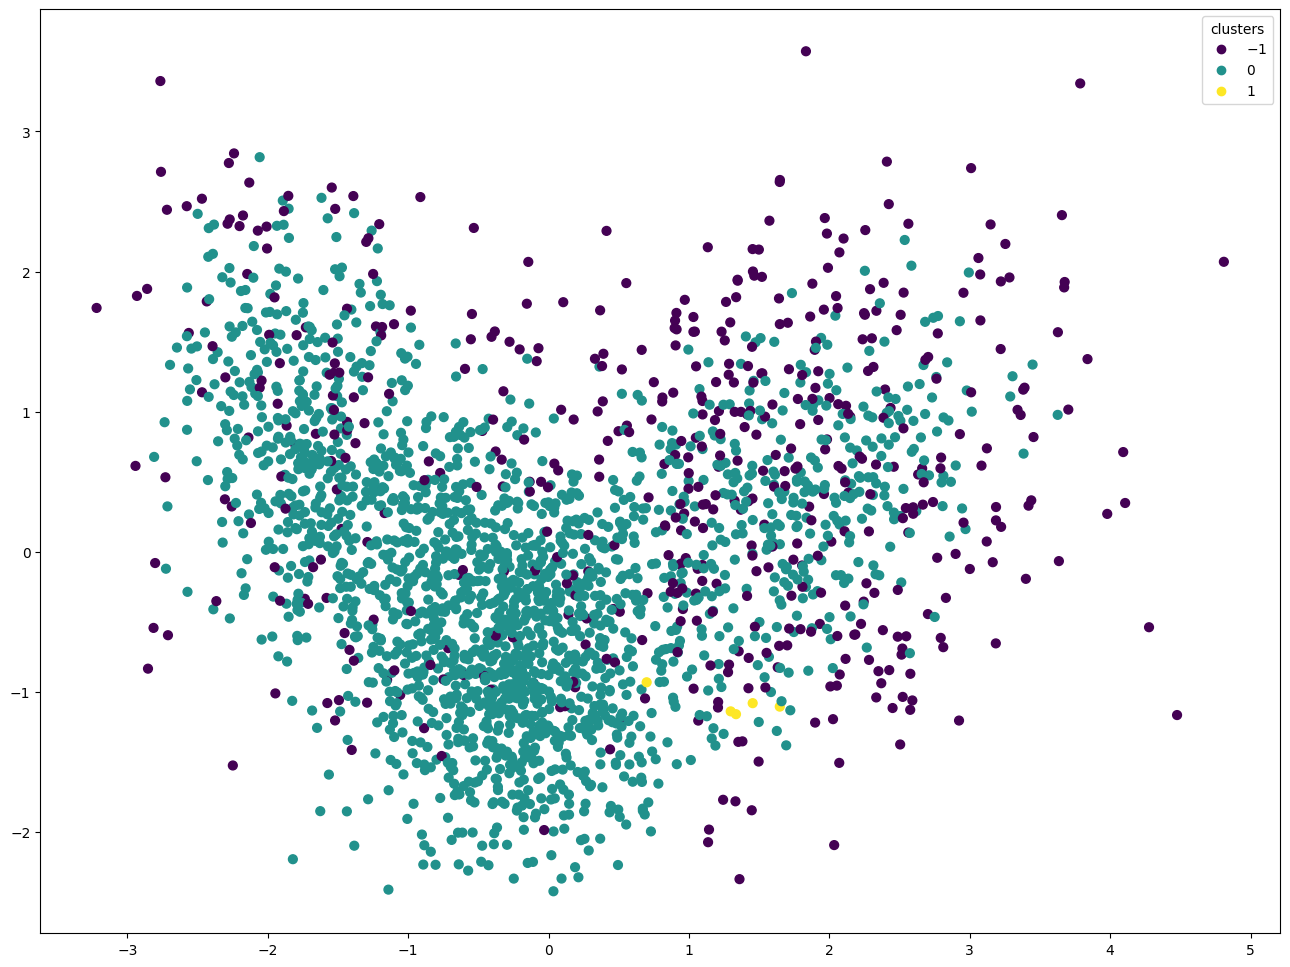

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(x,y,s=40,c=out_df['label'],cmap='viridis')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score as dunn_index

In [ ]:
print('Dunn Index for DBSCAN:',dunn_index(std_df,dbsc.labels_))

Dunn Index for DBSCAN: 2.97292858543806


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print('Silhouette Score for DBSCAN:',silhouette_score(std_df,dbsc.labels_))

Silhouette Score for DBSCAN: 0.006039515119794661


In [ ]:
print("Time taken by DBSCAN:",end-start)

Time taken by DBSCAN: 0.08474493026733398
